In [1]:
import numpy as np 
from sklearn import datasets
import pandas as pd

Получаем данные ирис

In [17]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=[f'Param{i}' for i in range(1,5)])

In [18]:
df.describe()

,Param1,Param2,Param3,Param4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
u, s, v = np.linalg.svd(df, full_matrices=False)
u

array([[-6.16168450e-02,  1.29611444e-01,  2.13859674e-03,
         1.63819140e-03],
       [-5.80709402e-02,  1.11019776e-01,  7.06723871e-02,
         5.17569646e-02],
       [-5.67630474e-02,  1.17966465e-01,  4.34254909e-03,
         9.55702427e-03],
       [-5.66534426e-02,  1.05308145e-01,  5.92467197e-03,
        -4.16438911e-02],
       [-6.12302023e-02,  1.31089790e-01, -3.18810953e-02,
        -3.22148124e-02],
       [-6.75031684e-02,  1.30884835e-01, -6.85371918e-02,
        -1.13642477e-02],
       [-5.74820774e-02,  1.16598182e-01, -6.64136685e-02,
        -2.67433923e-02],
       [-6.09726328e-02,  1.20943120e-01,  5.43026565e-03,
        -2.40566566e-02],
       [-5.37611959e-02,  9.99414853e-02,  1.76366479e-02,
        -1.65153852e-02],
       [-5.88266594e-02,  1.12043088e-01,  6.49689136e-02,
        -3.04719804e-02],
       [-6.52918230e-02,  1.36578094e-01,  4.93585934e-03,
        -6.46942221e-03],
       [-5.99417779e-02,  1.13753142e-01, -2.52977575e-02,
      

In [28]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [29]:
v

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

Видим, что можно избавиться от 2 признаков. Зануляем значения 

In [41]:
s[2] = s[3] = 0
x1 = u.dot(np.eye(4)*s).dot(v)

Находим базисы

In [43]:
cov1 = np.cov(x1.T)
cov1

array([[ 0.68222377, -0.0208085 ,  1.28603382,  0.52241054],
       [-0.0208085 ,  0.13721124, -0.34521301, -0.15395272],
       [ 1.28603382, -0.34521301,  3.10979132,  1.2939947 ],
       [ 0.52241054, -0.15395272,  1.2939947 ,  0.53951014]])

In [49]:
sval, svec = np.linalg.eig(cov1)
print(sval)
print(svec)

[ 4.22815554e+00  2.40580934e-01 -4.98584854e-17  9.09092212e-17]
[[-0.36356257  0.71605943  0.59588686  0.31909374]
 [ 0.08751286  0.66010344 -0.73983321 -0.31494318]
 [-0.85655868 -0.17801903 -0.30868353 -0.48053975]
 [-0.35562761 -0.1408246  -0.04775085  0.7537052 ]]


SVD разложение ковариационной матрицы

In [50]:
u, s, v = np.linalg.svd(cov1)

In [51]:
u

array([[-0.36356257, -0.71605943,  0.18299245, -0.56709339],
       [ 0.08751286, -0.66010344, -0.13565893,  0.73362225],
       [-0.85655868,  0.17801903, -0.45002845,  0.17913919],
       [-0.35562761,  0.1408246 ,  0.86347253,  0.32880485]])

In [53]:
v.T

array([[-0.36356257, -0.71605943,  0.51272813, -0.30362974],
       [ 0.08751286, -0.66010344, -0.58757518,  0.45973945],
       [-0.85655868,  0.17801903, -0.4558026 , -0.16389157],
       [-0.35562761,  0.1408246 ,  0.42907955,  0.81828368]])

In [62]:
x_new = x1.dot(v.T)
x_new = x_new[:,:2]

array([[-2.81818175, -5.68487355],
       [-2.78922566, -5.21160995],
       [-2.61335471, -5.21822065],
       [-2.75706148, -5.04500056],
       [-2.7730742 , -5.67927795],
       [-3.2203385 , -6.08216213],
       [-2.68071451, -5.24675103],
       [-2.87623264, -5.52945536],
       [-2.61619567, -4.78756989],
       [-2.83056748, -5.27390085],
       [-2.99540381, -6.01391017],
       [-2.889176  , -5.36844157],
       [-2.71730665, -5.15408647],
       [-2.27855776, -4.84946246],
       [-2.85760738, -6.55177068],
       [-3.1143391 , -6.66263548],
       [-2.87771503, -6.15336974],
       [-2.85374451, -5.67079109],
       [-3.30259579, -6.24505207],
       [-2.91314652, -5.85102022],
       [-3.19296941, -5.78027533],
       [-2.95746056, -5.77092742],
       [-2.28502571, -5.4640618 ],
       [-3.1993402 , -5.45719978],
       [-3.1461436 , -5.31503586],
       [-2.99689365, -5.24761209],
       [-3.03301403, -5.48348854],
       [-2.94019387, -5.73867759],
       [-2.86328929,

In [63]:
import matplotlib.pyplot as plt

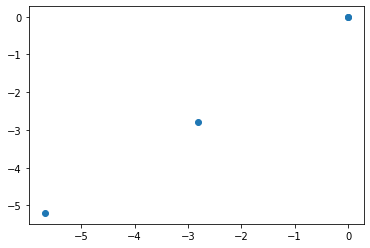

In [65]:
plt.scatter(x_new[0], x_new[1])